In [ ]:
# @title 1- DATA PREPARATION
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
file = pd.ExcelFile('heart_disease.xlsx')
abr = pd.read_excel(file, 'Description')          # Coloumn headers abbreviation sheet
df = pd.read_excel(file, 'Heart_disease')         # Main dataframe sheet

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [ ]:
# @title 2-EDA
df.shape


(908, 13)

In [ ]:
df.info()    #we have 6 numerical columns , 6 categorical columns and 1 boolean column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [ ]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [ ]:
df.isnull().sum()  #we have 62 null values in oldpeak columns

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [ ]:
df.describe(include='object')

,sex,cp,restecg,exang,slope,thal
count,908,908,908,908,908,908
unique,2,4,3,4,3,3
top,Male,asymptomatic,normal,False,flat,normal
freq,718,495,542,516,453,386


In [ ]:
#filling null values using meadian values
median_values=df['oldpeak'].median()
df['oldpeak'].fillna(median_values,inplace=True)

In [ ]:
df.isnull().sum()  #successfully treated missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [ ]:
df_num=df.select_dtypes(include=['int64','float64'])

In [ ]:
df_num.corr()

,age,trestbps,chol,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,-0.328088,0.217942,0.326493
trestbps,0.253999,1.000000,0.117488,-0.133360,0.134945,0.137251
chol,-0.099967,0.117488,1.000000,0.197907,0.032205,-0.238813
thalch,-0.328088,-0.133360,0.197907,1.000000,-0.112624,-0.323058
oldpeak,0.217942,0.134945,0.032205,-0.112624,1.000000,0.406078
num,0.326493,0.137251,-0.238813,-0.323058,0.406078,1.000000


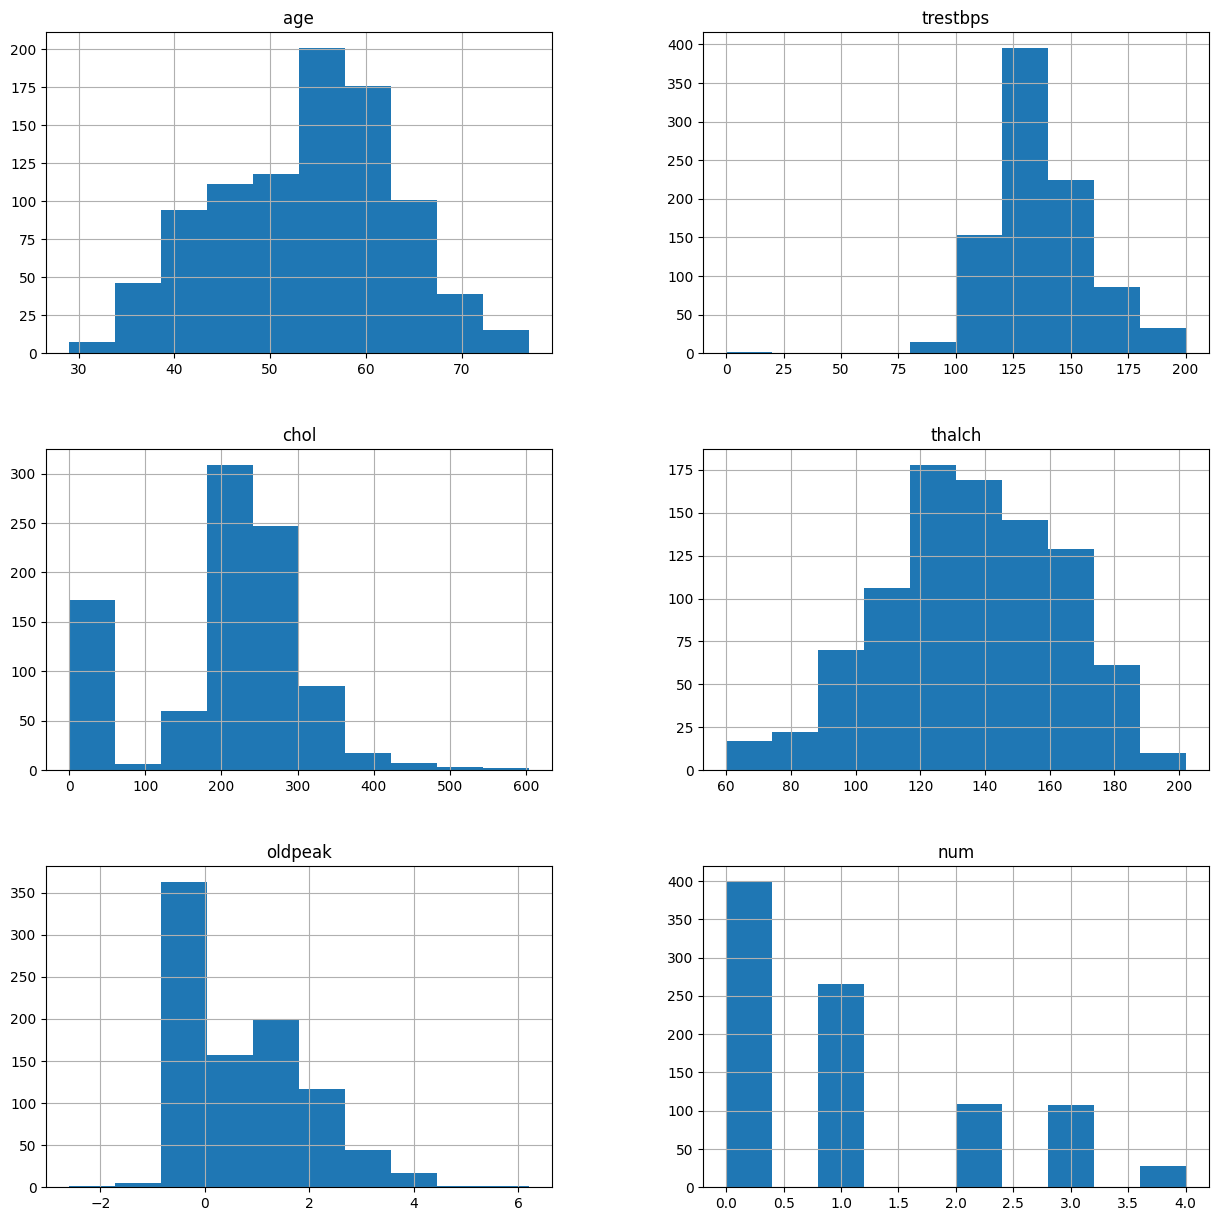

In [ ]:
df.hist(figsize=(15,15))
plt.show()

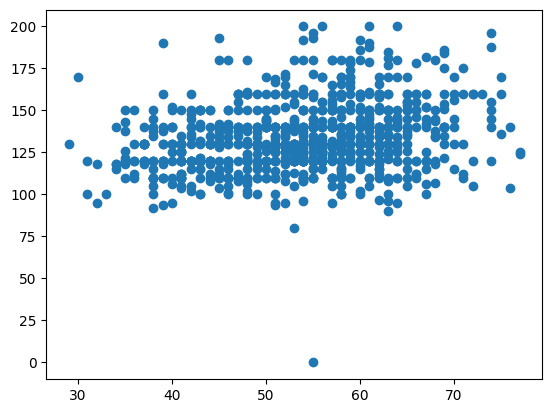

In [ ]:
plt.scatter(df['age'],df['trestbps'])

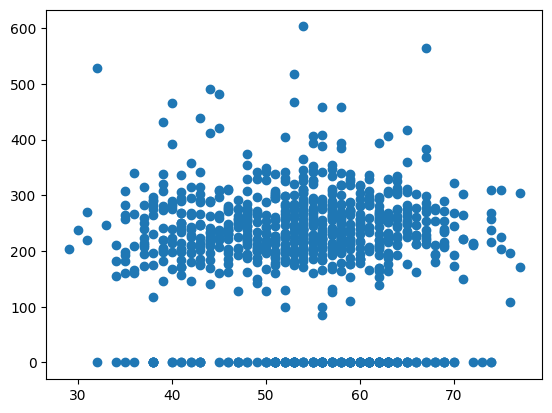

In [ ]:
plt.scatter(df['age'],df['chol'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7c07f67f61a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c07f68375b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c07f67f5f00>],
 'medians': [<matplotlib.lines.Line2D at 0x7c07f67e02e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c07f67f65c0>],
 'means': []}

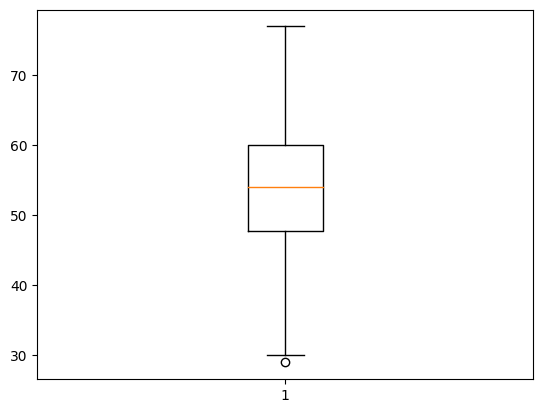

In [ ]:
plt.boxplot(df['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7c07f6753010>,
 'caps': [<matplotlib.lines.Line2D at 0x7c07f6753a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c07f6753c70>],
 'medians': [<matplotlib.lines.Line2D at 0x7c07f6699330>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c07f6699d80>],
 'means': []}

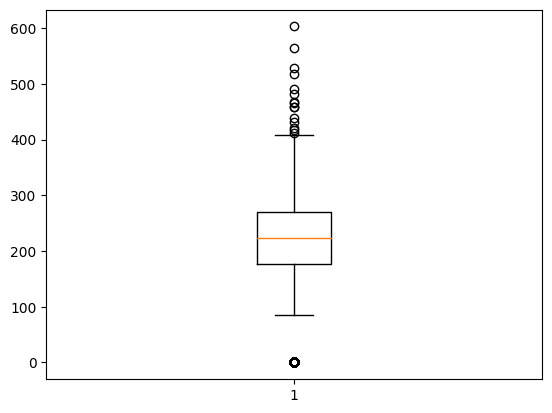

In [ ]:
plt.boxplot(df['chol'])

In [ ]:
# @title 3- feature engineering
df.drop_duplicates(inplace=True)

In [ ]:
df.shape  # we had one duplicate

(907, 13)

In [ ]:
#we have already treated missing values


In [ ]:
# now lets convert category data to numerical data using label encoder
# we have 6 category data columns
from sklearn.preprocessing import LabelEncoder


In [ ]:
df=pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','thal'])

In [ ]:
df.head()

,age,trestbps,chol,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,...,exang_False,exang_True,exang_FALSE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,150,2.3,0,False,True,False,False,...,True,False,False,False,True,False,False,True,False,False
1,41,135,203,132,0.0,0,False,True,False,True,...,True,False,False,False,False,True,False,True,False,False
2,57,140,192,148,0.4,0,False,True,True,False,...,True,False,False,False,False,True,False,True,False,False
3,52,118,186,190,0.0,0,False,True,False,False,...,True,False,False,False,False,True,False,True,False,False
4,57,110,201,126,1.5,0,False,True,True,False,...,False,True,False,False,False,True,False,True,False,False


In [ ]:
df=df.replace({True:1, False:0})

In [ ]:
df.head()

,age,trestbps,chol,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,...,exang_False,exang_True,exang_FALSE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63,145,233,150,2.3,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
1,41,135,203,132,0.0,0,0,1,0,1,...,1,0,0,0,0,1,0,1,0,0
2,57,140,192,148,0.4,0,0,1,1,0,...,1,0,0,0,0,1,0,1,0,0
3,52,118,186,190,0.0,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
4,57,110,201,126,1.5,0,0,1,1,0,...,0,1,0,0,0,1,0,1,0,0


In [ ]:
  from sklearn.preprocessing import StandardScaler

In [ ]:
sc= StandardScaler()
data=sc.fit_transform(df)

In [ ]:
data

array([[ 1.00609656,  0.56818423,  0.28131786, ...,  2.03799144,
        -0.85880609, -0.78533801],
       [-1.39644661,  0.07784827,  0.01369116, ...,  2.03799144,
        -0.85880609, -0.78533801],
       [ 0.35085751,  0.32301625, -0.08443863, ...,  2.03799144,
        -0.85880609, -0.78533801],
       ...,
       [ 0.241651  ,  1.79402415, -1.79724952, ..., -0.4906792 ,
         1.16440721, -0.78533801],
       [ 0.241651  ,  0.51915064,  0.05829561, ...,  2.03799144,
        -0.85880609, -0.78533801],
       [ 0.35085751,  0.42108344,  0.67383702, ..., -0.4906792 ,
        -0.85880609,  1.27333707]])

In [ ]:
new_df=pd.DataFrame(data,columns=df.columns)

In [ ]:
new_df.head()

,age,trestbps,chol,thalch,oldpeak,num,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,...,exang_False,exang_True,exang_FALSE,exang_TURE,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,1.006097,0.568184,0.281318,0.523285,1.353255,-0.880901,-0.514775,0.514775,-1.096110,-0.471563,...,0.870489,-0.767099,-0.146275,-0.203302,2.194106,-0.998898,-0.699519,2.037991,-0.858806,-0.785338
1,-1.396447,0.077848,0.013691,-0.148399,-0.816467,-0.880901,-0.514775,0.514775,-1.096110,2.120606,...,0.870489,-0.767099,-0.146275,-0.203302,-0.455766,1.001103,-0.699519,2.037991,-0.858806,-0.785338
2,0.350858,0.323016,-0.084439,0.448654,-0.439124,-0.880901,-0.514775,0.514775,0.912318,-0.471563,...,0.870489,-0.767099,-0.146275,-0.203302,-0.455766,1.001103,-0.699519,2.037991,-0.858806,-0.785338
3,-0.195175,-0.755723,-0.137964,2.015918,-0.816467,-0.880901,-0.514775,0.514775,-1.096110,-0.471563,...,0.870489,-0.767099,-0.146275,-0.203302,-0.455766,1.001103,-0.699519,2.037991,-0.858806,-0.785338
4,0.350858,-1.147992,-0.004151,-0.372294,0.598569,-0.880901,-0.514775,0.514775,0.912318,-0.471563,...,-1.148779,1.303612,-0.146275,-0.203302,-0.455766,1.001103,-0.699519,2.037991,-0.858806,-0.785338


In [ ]:
# @title 4- decision tree classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [ ]:
new_df['num'].isnull().sum()

1

In [ ]:
new_df['num'].fillna(df['num'].mean(),inplace=True)

In [ ]:
new_df['num'].isnull().sum()

0

In [ ]:
new_df['num'] = (df['num'] > 0).astype(int)

x=new_df.drop('num',axis=1)
y=new_df.num

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
y_train.fillna(y_train.mean(),inplace=True)
y_test.fillna(y_test.mean(),inplace=True)
y_train=y_train.astype(int)
y_test=y_test.astype(int)

In [ ]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [ ]:
#evaluate the model
pred=model.predict(x_test)


In [ ]:
pd.Series(pred).value_counts()

1    109
0     73
Name: count, dtype: int64

In [ ]:
model.feature_importances_

array([0.12031576, 0.02703284, 0.16975143, 0.02695968, 0.05742452,
       0.02933345, 0.        , 0.38300437, 0.        , 0.        ,
       0.01564101, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.09945751, 0.01063113, 0.        ,
       0.        , 0.0060091 , 0.        , 0.        , 0.05443919,
       0.        ])

In [ ]:

np.mean(pred==y_test)   #to measure accuracy

0.8131868131868132

In [ ]:
pd.crosstab(y_test,pred)

col_0,0,1
num,,
0,64,25
1,9,84


In [ ]:
accuracy = accuracy_score(y_test,pred)
precision = precision_score(y_test,pred, average='weighted')
recall = recall_score(y_test, pred, average='weighted')
f1 = f1_score(y_test,pred, average='weighted')
roc_auc = roc_auc_score(y_test,pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('ROC-AUC:', roc_auc)



Accuracy: 0.8131868131868132
Precision: 0.8225116595105284
Recall: 0.8131868131868132
F1 Score: 0.8113600126801447
ROC-AUC: 0.8111634650235593


In [ ]:
# @title 5-hyper parameter tuning


In [ ]:
from sklearn.model_selection import GridSearchCV
#defining grid
grid={
    'max_depth':[2,3,4,5,7,9],
    'min_samples_split':[2,3,4,5,7,10],
    'criterion':['gini','entropy']

}
 # now creating a decision tree classifier
dtc= DecisionTreeClassifier()
  # now grid search
grid_search=GridSearchCV(estimator=dtc,param_grid=grid,cv=5)

  # fiting grid
grid_search.fit(x_train,y_train)

  # getting best parameters
best_param=grid_search.best_params_

  # showing best model
best_model=grid_search.best_estimator_

  #evaluating best models
pred=best_model.predict(x_test)
accuracy=accuracy_score(y_test,pred)
precision=precision_score(y_test,pred,average='weighted')
recall=recall_score(y_test,pred,average='weighted')
f1=f1_score(y_test,pred,average='weighted')
roc_auc=roc_auc_score(y_test,pred)

print('best estimators=', best_param)
print('accuracy',accuracy)
print('precision',precision)
print('recall',recall)
print('f1_score',f1)
print('roc_auc_score',roc_auc)

best estimators= {'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 3}
accuracy 0.8076923076923077
precision 0.8117603550295858
recall 0.8076923076923077
f1_score 0.8067278173056465
roc_auc_score 0.8062703878216746


<Axes: >

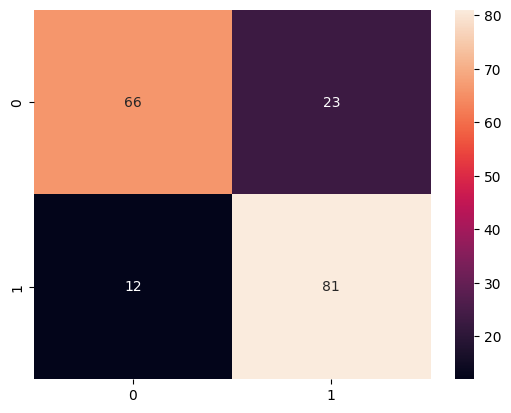

In [ ]:
# @title 6- model evaluation
cm=confusion_matrix(y_test,pred)
sns.heatmap(cm,annot=True)

In [ ]:
cm

array([[66, 23],
       [12, 81]])

In [ ]:
importances = best_model.feature_importances_
for i, feature in enumerate(x.columns):
    print(f"{feature}: {importances[i]}")

age: 0.05907411907981681
trestbps: 0.009817208313996184
chol: 0.20880072974756295
thalch: 0.01154143587331703
oldpeak: 0.0
sex_Female: 0.03566210772578278
sex_Male: 0.0
cp_asymptomatic: 0.502140242110953
cp_atypical angina: 0.0
cp_non-anginal: 0.0
cp_typical angina: 0.0
fbs_False: 0.0
fbs_True: 0.0
restecg_lv hypertrophy: 0.0
restecg_normal: 0.0
restecg_st-t abnormality: 0.0
exang_False: 0.025903559110090353
exang_True: 0.08227434794601242
exang_FALSE: 0.015893883373723647
exang_TURE: 0.0
slope_downsloping: 0.0
slope_flat: 0.0
slope_upsloping: 0.0
thal_fixed defect: 0.0
thal_normal: 0.048892366718744903
thal_reversable defect: 0.0


[Text(0.45535714285714285, 0.9, 'cp_asymptomatic <= -0.092\ngini = 0.49\nsamples = 725\nvalue = [311, 414]\nclass = 1'),
 Text(0.19642857142857142, 0.7, 'chol <= -0.74\ngini = 0.42\nsamples = 320\nvalue = [224, 96]\nclass = 0'),
 Text(0.10714285714285714, 0.5, 'exang_FALSE <= 3.345\ngini = 0.326\nsamples = 39\nvalue = [8, 31]\nclass = 1'),
 Text(0.07142857142857142, 0.3, 'exang_True <= 0.268\ngini = 0.272\nsamples = 37\nvalue = [6, 31]\nclass = 1'),
 Text(0.03571428571428571, 0.1, 'gini = 0.386\nsamples = 23\nvalue = [6, 17]\nclass = 1'),
 Text(0.10714285714285714, 0.1, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]\nclass = 1'),
 Text(0.14285714285714285, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = 0'),
 Text(0.2857142857142857, 0.5, 'age <= 0.296\ngini = 0.356\nsamples = 281\nvalue = [216, 65]\nclass = 0'),
 Text(0.21428571428571427, 0.3, 'exang_False <= -0.139\ngini = 0.247\nsamples = 194\nvalue = [166, 28]\nclass = 0'),
 Text(0.17857142857142858, 0.1, 'gini = 0.483\nsamples 

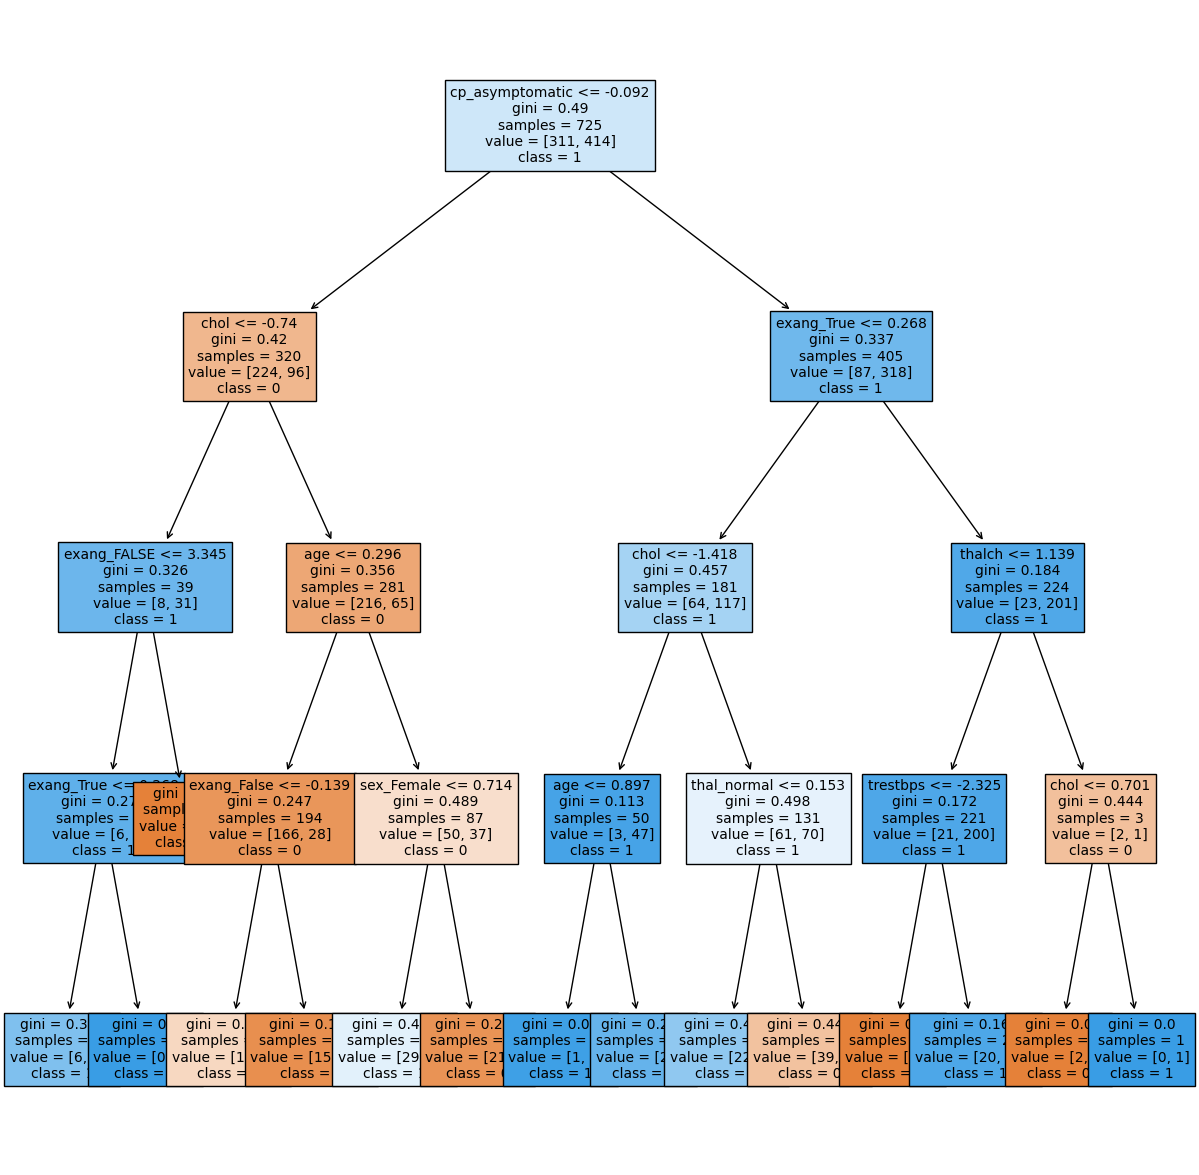

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
plot_tree(best_model,feature_names=x.columns.tolist(),class_names=['0','1'],fontsize=10,filled=True)

In [ ]:
# interview questions
#1)- Criterion: This specifies the function to measure the quality of a split. Common values include:
    # Gini impurity: A measure of how often a randomly chosen element would be incorrectly classified.
    # Entropy: Measures the information gain, which quantifies the amount of uncertainty reduced in the dataset by a split.
    # Max Depth: Limits the maximum depth of the tree. Tree depth directly impacts model complexity and overfitting.
    # Min Samples Split: Minimum number of samples required to split an internal node.
    # Each of these hyperparameters controls a different aspect of how the decision tree is built and can significantly impact its performance, including accuracy, computational efficiency, and generalization ability.
#2)- one-hot encoding- in ohe we create a dummy columns for each unique values in column, it does increases  the dimensionality of the dataset by increasing number of columns making it bit complex.
    # label encoding- in this we convert categorical data to numerical data in single column itself without creating dummy columns. we assign values by alphabetical order, this help in ransforming data without increasing the dimensionality.